In [1]:
#importing python library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset
data = pd.read_csv('DATA.csv')

In [3]:
#printing top 5 rows of the dataset
data.head()


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
#printing last 5 rows
data.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [5]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
data.shape

(100000, 9)

In [7]:
#findinf is there any null value in the dataset
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [9]:
#Dropping the unwanted columns as they are not going to contribute in the output
X = data.drop(columns=['Name','Gender','Location', 'CustomerID', 'Churn'], axis=1)
print(X)


       Age  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB
0       63                          17         73.36             236
1       62                           1         48.76             172
2       24                           5         85.47             460
3       36                           3         97.94             297
4       46                          19         58.14             266
...    ...                         ...           ...             ...
99995   33                          23         55.13             226
99996   62                          19         61.65             351
99997   64                          17         96.11             251
99998   51                          20         49.25             434
99999   27                          19         76.57             173

[100000 rows x 4 columns]


In [10]:
#storing the churn factor separetely as its our final output
Y = data['Churn']
print(Y)

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64


In [11]:
#Correlation
#establishing correlation btw all factors
correlation = X.corr()

<Axes: >

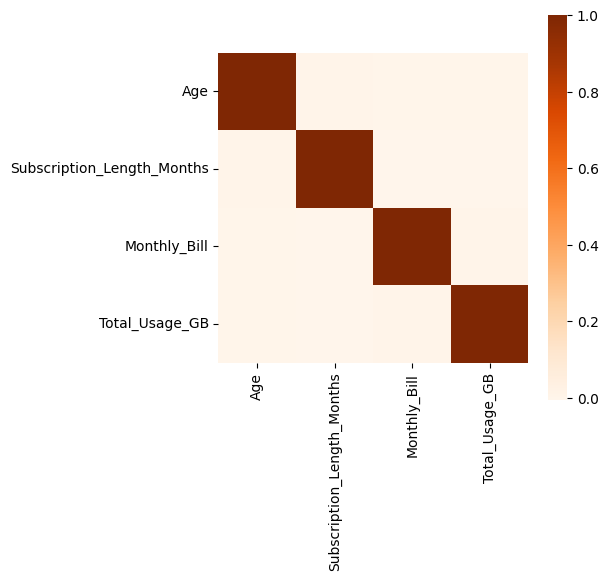

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar= True, square= True, fmt = '.1f', annot_kws= {'size' : 8}, cmap = 'Oranges' )

In [13]:
#splitting the dataset training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [14]:
print(Y.shape, Y_train.shape, Y_test.shape)

(100000,) (80000,) (20000,)


In [15]:
#loadind the model for trainning the datadet
model = RandomForestClassifier()

In [16]:

model.fit(X_train, Y_train)

RandomForestClassifier()

In [17]:
#finding the accuracy of the test model
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [18]:
print('Acuuracy : ', test_data_accuracy)

Acuuracy :  0.50005


                           Predictive System

In [20]:



input_data = (53,12,64.49,383)

input_array = np.asarray(input_data)

input_reshaped = input_array.reshape(1, -1)

prediction = model.predict(input_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Satisfied')
else:
  print('Unsatisfied')

[1]
Satisfied


c:\Users\namra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
